# Milestone 2 - CasierVert952

## 0. Initial configuration

### 0.1 Data preprocessing

In this phase, we will start by demonstrating how we transformed the ```TXT``` ratings files (for both BA and RB) into CSV format. Next, we will merge the various data files and rename the columns to create a dataframes containing all available feature for each of the datasets. Afterward we will clean and modify some features such as dates and locations to meet our needs. Finally, we will save the cleaned data into ```CSV``` files to be able to load them quickly.

This step can be found on [data_preprocessing.ipynb](data_preprocessing.ipynb), which has to be entirely executed once to be able to run the following cells.

The ```data``` directory should now look like this :

```
data/
├── BeerAdvocate
│   ├── beers.csv
│   ├── breweries.csv
│   ├── users.csv
│   ├── ratings.csv
│   └── BA_cleaned.csv
│
├── RateBeer
│   ├── beers.csv
│   ├── breweries.csv
│   ├── users.csv
│   ├── ratings.csv
│   └── RB_cleaned.csv
│
└── US president
    ├── 1976-2020-president.csv
    └── sources-president.csv
```

### 0.2 Importation of libraries and golbal variable declarations

In [1]:
exec(open('python/section_0_imports.py').read())

## 1. Data loading and visualization

### 1.1 Loading cleaned data

The preprocessing task having already been done, the cleaned data just has to be loaded. It can take up to 2 minutes to complete.

In [2]:
from section_1_data_loading import load_data_BA, load_data_RB

# Load the data for the BA dataset
BA_cleaned, BA_beers, BA_breweries, BA_users = load_data_BA(BA_DATA_PATH)

# Load the data for the RB dataset
RB_cleaned, RB_beers, RB_breweries, RB_users = load_data_RB(RB_DATA_PATH)

Loading of BA data ended in 49.38007473945618 seconds.
Loading of RB data ended in 31.975876808166504 seconds.


### 1.2 Data visualization

The following illustrates the structure of our data after the preprocessing. In the future we will explore and refine our data, and then for the analyses we will create derived DataFrames from ```BA_cleaned``` and ```RB_cleaned``` by copying them and then, removing, modifying, and adding features to these copies as needed.

In [3]:
# Display 3 samples of the BA dataset
print("Visualization of BA :")
display(BA_cleaned.sample(3).T)

# Display 3 samples of the RB dataset
print("\nVisualization of RB :")
display(RB_cleaned.sample(3).T)

Visualization of BA :


,2252271,3746155,2936019
rating_date,04-2011,08-2013,10-2013
rating_appearance,4.5,NaN,NaN
rating_aroma,5.0,NaN,NaN
rating_palate,3.0,NaN,NaN
rating_taste,3.0,NaN,NaN
rating_overall,3.0,NaN,NaN
rating,3.57,3.25,3.5
beer_id,10386,38660,104
beer_name,Dorado Double IPA,Obovoid Oak-Aged Oatmeal Stout,Samuel Adams Boston Lager
beer_style,American Double / Imperial IPA,Russian Imperial Stout,Vienna Lager



Visualization of RB :


,1339400,211910,4157286
rating_date,11-2013,11-2006,04-2015
rating_appearance,2,3,3
rating_aroma,5,7,8
rating_palate,4,3,4
rating_taste,5,5,7
rating_overall,8,12,16
rating,2.4,3.0,3.8
beer_id,31664,69403,183350
beer_name,Dinkelacker Weihnachtsfest-Bier,Saint Arnould LOr Noir,Nimble Hill Midnight Fuggle Robust Porter
beer_style,Oktoberfest/Märzen,Dry Stout,Porter


> Here, it can be seen that there is the user's information and his rating on a particular beer. Attached to that, there is a variety of data about the beer characteristics and informations about its corresponding brewery. We will later remove some of these features, as they are not all required.
>
> It can also be seen that BA and RB have different features sets. Moreover, some data are missing, the fields may be empty (NaN).

## 2. Data exploration of the two beers's datasets 

Indeed, we are given two different but very similar datasets to perform our analysis. Let's begin by examining them to determine the best approach : using one dataset only, combining both, or creating a blend of the two. We will use these discoveries in the next section when 
refiningthe data. 


### 2.1 Sizes

We will first look into their size.

In [4]:
# Print sizes of each Dataframe for both datasets.
print("BA :")
print("   Number of ratings   : " + str(BA_cleaned.shape[0]))
print("   Number of beers     : " + str(BA_beers.shape[0]))
print("   Number of breweries : " + str(BA_breweries.shape[0]))
print("   Number of users     : " + str(BA_users.shape[0]))

print("\nRB :")
print("   Number of ratings   : " + str(RB_cleaned.shape[0]))
print("   Number of beers     : " + str(RB_beers.shape[0]))
print("   Number of breweries : " + str(RB_breweries.shape[0]))
print("   Number of users     : " + str(RB_users.shape[0]))

BA :
   Number of ratings   : 8392192
   Number of beers     : 280823
   Number of breweries : 16758
   Number of users     : 153704

RB :
   Number of ratings   : 6324380
   Number of beers     : 442081
   Number of breweries : 24189
   Number of users     : 70174


> The RB dataset contains more data on different beers and breweries, but less users than the BA one. Both datasets have around 7-8 millions user's ratings, which seems at first sight enough to perfom our analysis.

### 2.2 Missing values

We will check how many value are missing the features columns. It will help us to decide what to remove during the "Data refinement" phase.

In [5]:
from section_2_data_exploration import compute_missing_value_in_datsets

# Computing missing value for all field for both datasets
missing_data_BA, missing_data_RB = compute_missing_value_in_datsets(BA_cleaned, RB_cleaned)

# Print the results for both datasets (one after the other)
display(missing_data_BA, missing_data_RB)

,Column,Missing Values (BA),% (BA)
beer_avg_matched_valid_ratings,beer_avg_matched_valid_ratings,7464671,88.947810
beer_zscore,beer_zscore,7436327,88.610068
beer_bros_score,beer_bros_score,5283785,62.960726
rating_aroma,rating_aroma,3622979,43.170831
rating_palate,rating_palate,3622979,43.170831
rating_taste,rating_taste,3622979,43.170831
rating_overall,rating_overall,3622979,43.170831
rating_appearance,rating_appearance,3622979,43.170831
breweries_state,breweries_state,1481852,17.657508
user_state,user_state,1089052,12.976967


,Column,Missing Values (RB),% (RB)
beer_zscore,beer_zscore,5441455,86.039343
beer_avg_matched_valid_ratings,beer_avg_matched_valid_ratings,5441455,86.039343
user_state,user_state,3433616,54.291741
breweries_state,breweries_state,3312434,52.375632
overall_score,overall_score,826064,13.061581
style_score,style_score,809875,12.805603
user_country,user_country,180836,2.859347
user_location,user_location,180836,2.859347
beer_abv,beer_abv,171055,2.704692
user_join_date,user_join_date,2292,0.036241


> Here, we see that our data of interest (mainly user_location, breweries locations and ratings) have some missing values in the user_location column, meaning these ratings will have to get discarded later. Additionnaly, we see that breweries_state and user_state are frequently missing but this is normal because sometimes the user might not be located in the US and the state is not precised in these cases.

### 2.3 Country Representation

To be able to have a proper study on the influence of politics on beer appreciation, we need to investigate the representation of countries in both datasets. This will assist us in selecting the most appropriate political datasets for our final analyses.

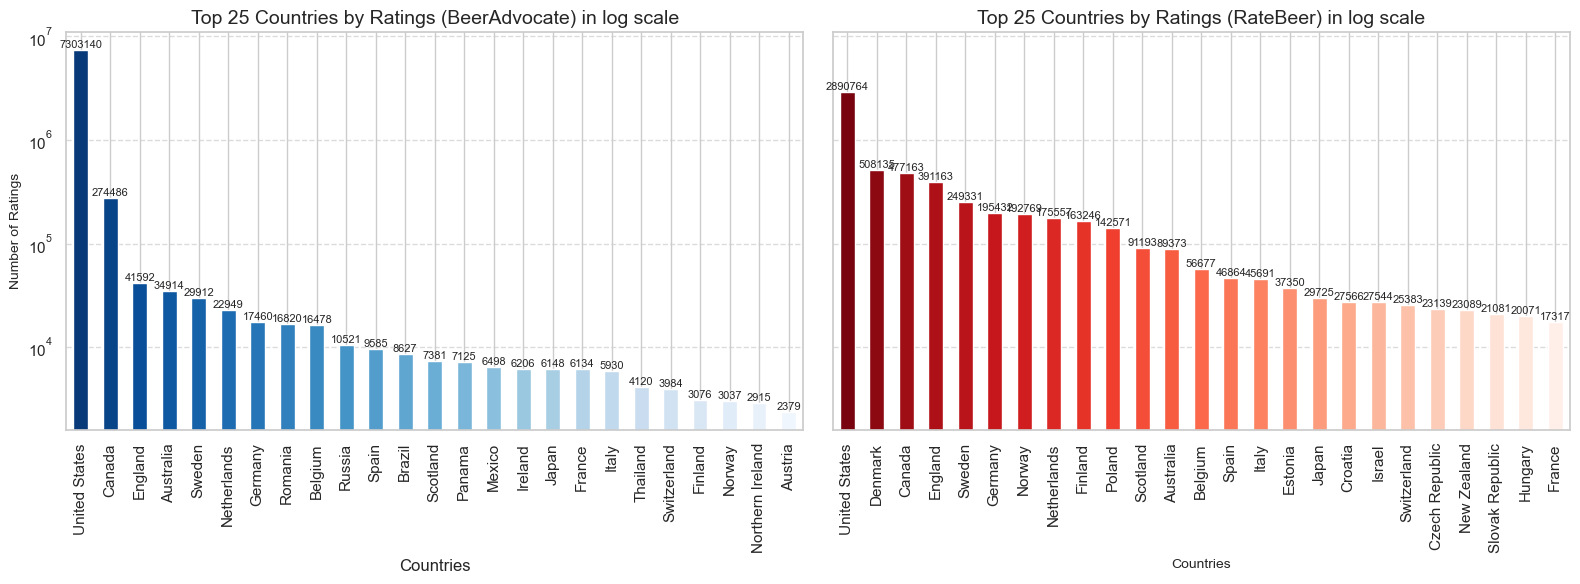

In [6]:
from section_2_data_exploration import ploting_country_representation

# Compute number of ratings per country
BA_count_per_country = BA_cleaned.groupby('user_country').size().nlargest(25)
RB_count_per_country = RB_cleaned.groupby('user_country').size().nlargest(25)

# Plotting the results
ploting_country_representation(BA_count_per_country, RB_count_per_country, 'log')

In [7]:
# Top 10 country ratings with precise values
country_comparison = pd.DataFrame({'Country (BA)': BA_count_per_country.index,'# of Ratings (BeerAdvocate)': BA_count_per_country.values,'% of Ratings (BeerAdvocate)': np.round(BA_count_per_country.values / len(BA_cleaned) * 100, 2),'Country (RB)': RB_count_per_country.index,'# of Ratings (RateBeer)': RB_count_per_country.reindex(RB_count_per_country.index, fill_value=0).values,'% of Ratings (RateBeer)': np.round(RB_count_per_country.reindex(RB_count_per_country.index, fill_value=0).values / len(RB_cleaned) * 100, 2)})
country_comparison.index = range(1, len(country_comparison) + 1)
country_comparison.head(10)

,Country (BA),# of Ratings (BeerAdvocate),% of Ratings (BeerAdvocate),Country (RB),# of Ratings (RateBeer),% of Ratings (RateBeer)
1,United States,7303140,87.02,United States,2890764,45.71
2,Canada,274486,3.27,Denmark,508135,8.03
3,England,41592,0.50,Canada,477163,7.54
4,Australia,34914,0.42,England,391163,6.19
5,Sweden,29912,0.36,Sweden,249331,3.94
6,Netherlands,22949,0.27,Germany,195432,3.09
7,Germany,17460,0.21,Norway,192769,3.05
8,Romania,16820,0.20,Netherlands,175557,2.78
9,Belgium,16478,0.20,Finland,163246,2.58
10,Russia,10521,0.13,Poland,142571,2.25


> We see that most of the ratings for both sites comes from USA and Canada first and then from European countries. It's not a problem for our project that will focus mainly on politics from US/Canada and European countries.

To be sure that we are not losing too much data from other continents, we will compute the percentage of ratings coming from US/Canada together and Europe together.

In [8]:
# Importing lists of countries (NA and EU) and the tool function
from helpers import european_countries, north_america_countries
from section_2_data_exploration import computing_NA_EU_countries

# Compute and print the percentage of rating in EU and NA
computing_NA_EU_countries(country_comparison, north_america_countries, european_countries)

NA:
   Total % of ratings (BA) : 90.3 %
   Total % of ratings (RB) : 53.2 %

EU:
   Total % of ratings (BA) : 2.3 %
   Total % of ratings (RB) : 36.7 %

Other continents (loss):
   Total % of ratings (BA) : 7.4 %
   Total % of ratings (RB) : 10.1 %


#### 2.3.1 Observations for BeerAdvocate

    - 90.3% of ratings from North America, 87% from US
    - 2.3% of ratings from Europe
    - 7.4% of ratings from other continents

> As our goal is to find relations between politics orientations and beers habits, we see that this datasets can help us to do it for north america (US and Canada) since most of ratings come from there. Meanwhile this dataset might not be adequate for Europe since it only represents 2.3% of the users's ratings. Since our analyses will be focused on US, the data that won't be used is about 9.7% (EU and Others).


#### 2.3.2 Observations for RateBeer

    - 51% of ratings from North America, 43.6% from US
    - 38.7% of ratings from Europe
    - 10.3% of ratings from other continents

> Since the repartition between country is more fair, this dataset could also be used for analyses about Europe, but we won't do it as we focus on US only. The data that won't be used represent 50% of the dataset which is, this time, very significant.

### 2.4 Ratings distribution over users

It is also interesting to explore the quantity of ratings that each user has published. Do we give more importance to regular users than to occasional ones ? Are users who have thousands and thousands of ratings relevant ? Are theses users biasing our results ?

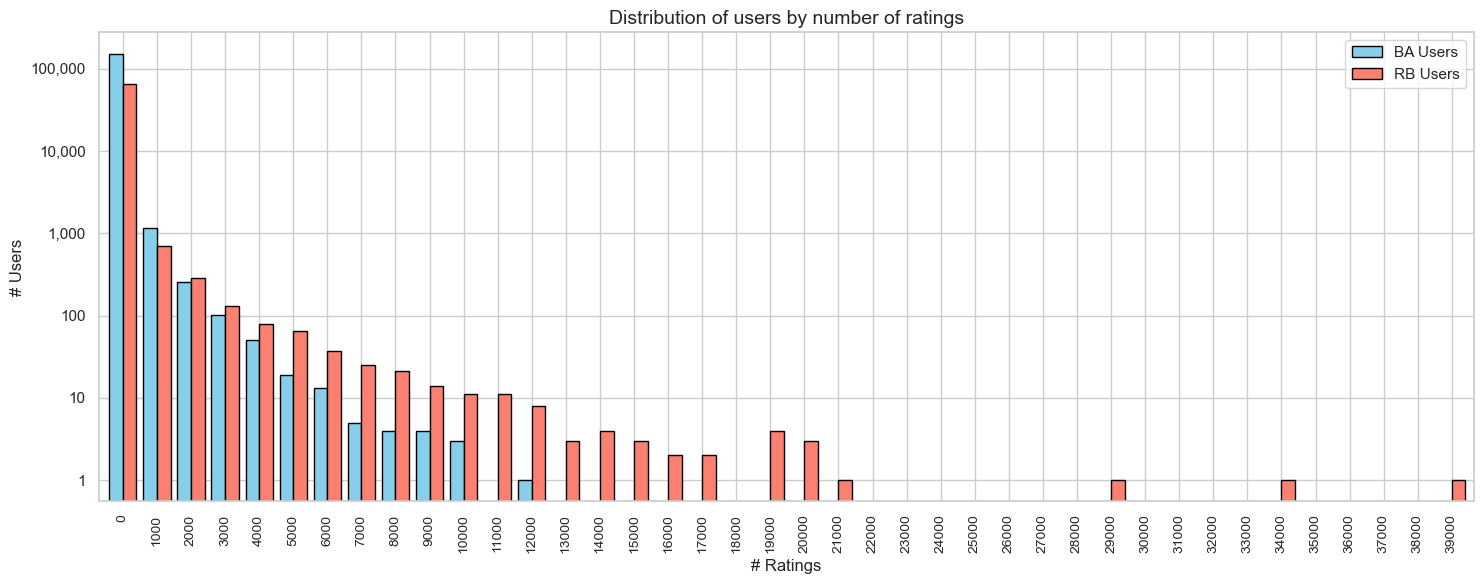

In [9]:
from section_2_data_exploration import ploting_user_ratings_distribution, number_ratings_by_user

# Get the number of ratings by user into bins
BA_ratings_bins, RB_ratings_bins, RB_ratings_by_user = number_ratings_by_user(BA_cleaned, RB_cleaned)

# Ploting the #ratings by users data
ploting_user_ratings_distribution(BA_ratings_bins, RB_ratings_bins)

> We observe that the distribuition of the BA datasets is smoother than the RB one. For the RB datasets, we notice around ten people above the 20,000 reviews, these people can be the origin of bias in our results as they have put so many ratings.

Let's analyse the origin of these high-rating users.

In [10]:
from section_2_data_exploration import high_rated_users_by_country

# Show ratings by contry (only ratings of high rating users)
high_rated_users_by_country(10000, RB_ratings_by_user, RB_cleaned)

,0,1,2,3,4,5,6,7,8,9,10,11
user_country,Denmark,United States,England,Canada,Sweden,Germany,Norway,Finland,Scotland,Netherlands,Estonia,Israel
#ratings,254189,158359,89748,69550,56275,45451,35341,34091,29423,20733,11982,11375


> We see that if we choose to remove all ratings of users that made more than 10'000 reviews isn't a real problem for us, as the majority of removed ratings would be from european users. We would still exclude more than 188,000 ratings from the US. However, this is not necessarily detrimental to our analysis, as the political opinions of users who have submitted 100 times more ratings than the average tend to be disproportionately weighted.

### 2.5 Ratings distribution over months

In our analyses, we will compare political properties with beer properties over time. It is important to examine the distribution of ratings across different months to ensure the relevance and validity of our results.

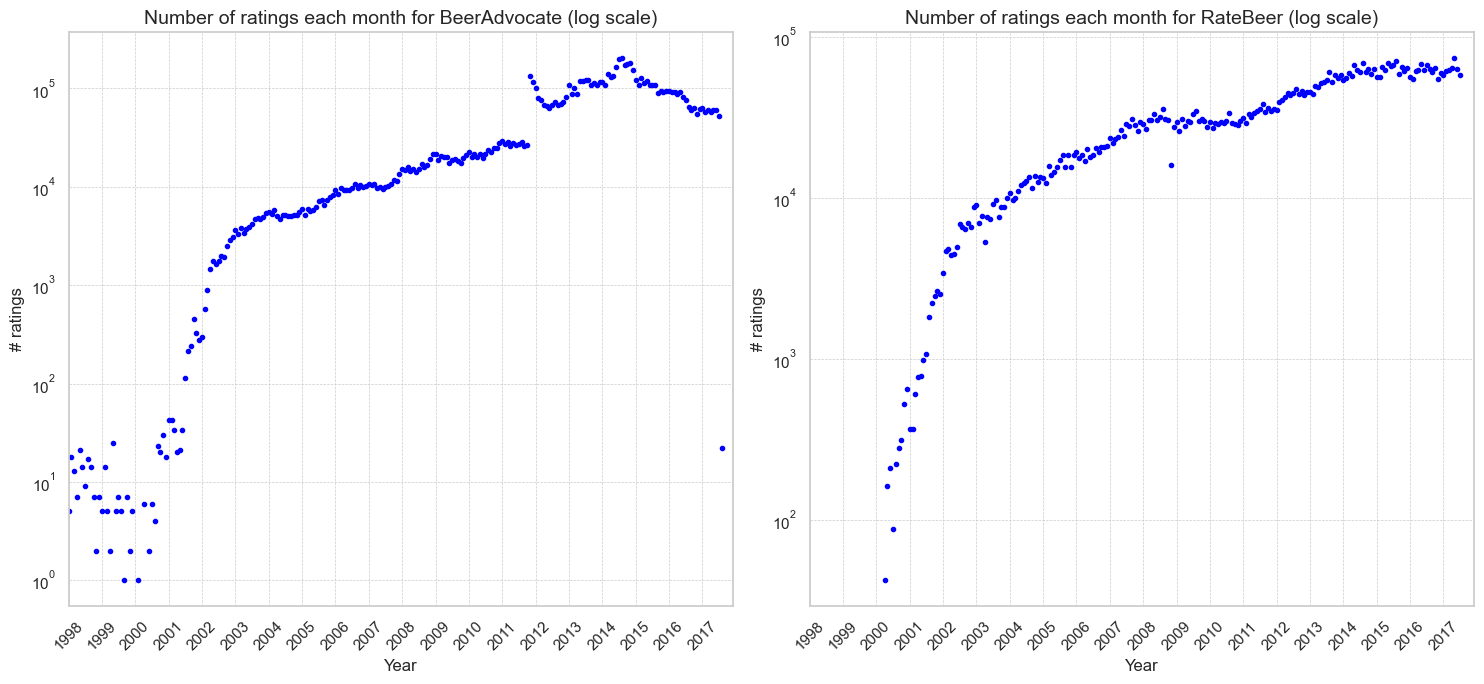

In [11]:
from section_2_data_exploration import ploting_ratings_by_month

# compute the #ratings by month
BA_ratings_by_month = BA_cleaned.groupby('rating_date').size().reset_index(name='#ratings').sort_index()
BA_ratings_by_month['rating_date'] = pd.to_datetime(BA_ratings_by_month['rating_date'], format='%m-%Y')

RB_ratings_by_month = RB_cleaned.groupby('rating_date').size().reset_index(name='#ratings').sort_index()
RB_ratings_by_month['rating_date'] = pd.to_datetime(RB_ratings_by_month['rating_date'], format='%m-%Y')

# plot the #ratings by months data
ploting_ratings_by_month(BA_ratings_by_month, RB_ratings_by_month, "log")

**For BeerAdvocate :**

> *Before 2002, the number of user ratings each month is very low (under 1000), which may pose problems for conducting a reliable statistical analysis. On the contrary, starting from 2007, there are more than 10,000 ratings per month, providing a solid foundation for more precise analysis. It can also be noted that starting from 2012, the data shows significant volatility, with the number of ratings varying greatly from one month to the next one.*

**For RateBeer :**

> *Before 2003, there is limited data, but after that year, the graph shows a consistent increase of data every month. This suggests that we can have more confidence in our results for the later years.*

### 2.6 Ratings distribution over beers

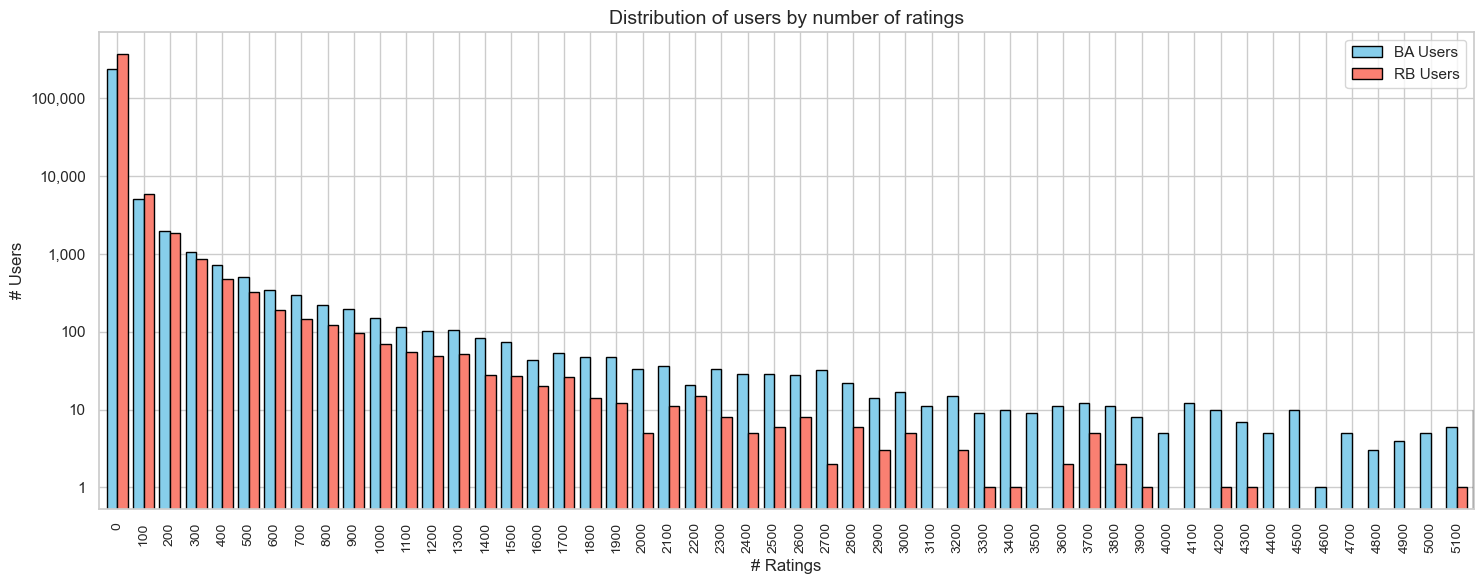

In [12]:
from section_2_data_exploration import ploting_beer_ratings_distribution, number_ratings_by_beer

# Get the number of ratings by beer into bins
BA_ratings_bins, RB_ratings_bins = number_ratings_by_beer(BA_cleaned, RB_cleaned)

# Ploting the #ratings by users data
ploting_beer_ratings_distribution(BA_ratings_bins, RB_ratings_bins)

> We observe that most of the beers have less than few hundreds of ratings and only a hundred of them have more than 3'000 ratings.

### 2.7 Duplicates

Here we want to observe the duplicate in the same dataset. By duplicate, we mean ratings on the same beer (```beer_id```) and from the same user (```user_id```).

In [13]:
# Check for duplicate for 'user_id' and 'beer_id' columns
duplicates_BA = BA_cleaned[BA_cleaned.duplicated(subset=['user_id', 'beer_id'], keep=False)]
duplicates_RB = RB_cleaned[RB_cleaned.duplicated(subset=['user_id', 'beer_id'], keep=False)]
duplicates_RB_usa = duplicates_RB.loc[duplicates_RB['user_country'].str.contains('United States', case = False, na = False)]

print("There is " + str(duplicates_BA.shape[0]) + " duplicate for BA dataset.")
print("There is " + str(duplicates_RB.shape[0]) + " duplicate for RB dataset, including " + str(duplicates_RB_usa.shape[0]) + " from USA.")

There is 0 duplicate for BA dataset.
There is 1742 duplicate for RB dataset, including 1592 from USA.


We observe that there is 1802 duplicate ratings for USA in the RB dataset and none in the BA one.

It seems that the two beer rating websites don't have the same policies regarding new ratings for beers that have already been rated by the user :

- BA seems to replace the previous user rating by the new one.
- RB seems to keep the old user ratings and add the new one.

In the next section (Data refinement), we will take care of retaining only the most recent user ratings when duplicates appears.

## 3. Beers data refinement

In this section, we will discuss our choice of removing some features and some ratings elements due to the quality of the data and the needs we have for it.

### 3.1 Dropping useless columns

The datasets contains really a lot of different informations about the beers, the users and the breweries. All these informations are not requiered for further the analyses and we can just drop them. Moreover, we make sure to have the same set of remaining columns on both datasets.

In [14]:
# list containing the colomns we want to drop
BA_columns_to_drop = ['beer_avg_matched_valid_ratings', 'beer_zscore', 'beer_bros_score', 'beer_ba_score', 'user_join_date', 'user_name', 'beer_nbr_reviews', 'user_nbr_reviews']
RB_columns_to_drop = ['beer_avg_matched_valid_ratings', 'beer_zscore', 'user_join_date', 'user_name', 'overall_score', 'style_score']

# dropping of the columns in both datasets
BA_cleaned = BA_cleaned.drop(columns = BA_columns_to_drop)
RB_cleaned = RB_cleaned.drop(columns = RB_columns_to_drop)

### 3.2 Dropping ratings with the user's location not available

Let first compute the number of missing user's location.

In [15]:
# Computing the number of ratings where the user's location is missing
BA_unavailable_user_loc = BA_cleaned['user_location'].isna().mean() * 100
RB_unavailable_user_loc  = RB_cleaned['user_location'].isna().mean() * 100

print("BA: Total % of missing user location : " + str(round(BA_unavailable_user_loc, 2)) + "%")
print("RB: Total % of missing user location : " + str(round(RB_unavailable_user_loc, 2)) + "%")

BA: Total % of missing user location : 5.96%
RB: Total % of missing user location : 2.86%


Here, we can see that the amount of data that will get discarded is not negligeable (6% and 3%), but this field is crucial for our analysis, so we decided to remove the ratings where the user location is missing.

In [16]:
# dropping the elements with no user_location
BA_refined = BA_cleaned.dropna(subset = ['user_location'])
RB_refined = RB_cleaned.dropna(subset = ['user_location'])

### 3.3 More specific data refinements

We have seen some particularities of the datasets during the data exploration phase. In this section, we implement our decisions to remove some parts of the data that could potentially reduce the accuracy of our results. We will handle the following case :

- Month distribution
- Ratings by user ditribution
- Duplicates

#### 3.3.1 Handle month distribution

We choose to keep the data corresponding to low-rating months, as it remains relevant for analyses that do not require a month-by-month or year breakdown.

However we keep in mind the information that the number of ratings greatly varies across months and years. It will be handled at analysis time if requiered.

#### 3.3.2 Handle ratings by user ditribution

We see in the exploration phase that removing all ratings of users that made more than 10'000 reviews isn't a real problem for us, as the majority of removed ratings are from european users. We will still remove more than 188k ratings. However, this is not necessarily detrimental to our analysis, as the political opinions of users who have submitted 100 times more ratings than the average tend to be disproportionately weighted.

#### TODO Faire la suppression

#### 3.3.3 Handle duplicates

#### TODO Faire la suppression

### 3.4 Creating dataframe of only US users

Based on the findings from the data exploration in the country section, and for the scope of our analysis section (5.), we create a Dataframe containing only the ratings of US residents.

In [17]:
# create Dataframe of only USA users
BA_usa = BA_refined.copy().loc[BA_cleaned['user_country'].str.contains('United States', case = False, na = False)]
RB_usa = RB_refined.copy().loc[RB_cleaned['user_country'].str.contains('United States', case = False, na = False)]

### 3.5 Fusioning of the two dataframe

Here we fusion our two datasets, but we keep track of the origin dataset, so that we will be able to perform analyses on both separately. Simply concatenate them would be dangerous as some columns with same names may have different meanings, properties or computations.

In [18]:
# Put value columns in the same types
BA_usa[['rating_appearance', 'rating_aroma', 'rating_palate', 'rating_taste', 'rating_overall']] = BA_usa[['rating_appearance', 'rating_aroma', 'rating_palate', 'rating_taste', 'rating_overall']].astype(float)
RB_usa[['rating_appearance', 'rating_aroma', 'rating_palate', 'rating_taste', 'rating_overall']] = RB_usa[['rating_appearance', 'rating_aroma', 'rating_palate', 'rating_taste', 'rating_overall']].astype(float)

# Add a source columns
BA_usa['source'] = 'BA'
RB_usa['source'] = 'RB'

# Fusioning the two datasets
USA_data = pd.concat([BA_usa, RB_usa], ignore_index = True)

In [19]:
print(BA_usa.shape)
print(RB_usa.shape)
print(USA_data.shape)

(7303140, 27)
(2890764, 27)
(10193904, 27)


### 3.6 Computing beers preferences

In this section, we will try to determine what are the favourite beers. One might argue that preferences can be simply identified by looking at the average rating of each beer. However, beers with only a few ratings may be over or under evaluated. Conversely, one could claim that the number of ratings a beer receives is a better indicator of its popularity. Here again it seams to not fullfil the concept of preference.

To solve that problem, we design a simple formula that compute a preference score for each beer. The score of a beer depends on two parameters :

$$ R \text{ : average rating of the beer} $$
$$ N \text{ : number of rating on that beer} $$

The formula we design is the following :

$$ Score =  R \cdot f(N) $$

where $$ f(N) = \min\left(1, {\log_{100}(N + 1)}\right) $$

The formula act as follow :

    - If the beer has more than a thresold "X" reviews, the average rating is trusted and the score is simply the average rating.
    - If the beer has less than "X" reviews, we considered that the average rating cannot be trusted, and score is the average rating reduced by a factor.

The reduction factor is calculated using the function ```f(N)``` (shown below), which is based on the logarithmic function. As the number of ratings approaches the thresold ```X```, the reduction factor increases and approaches 1.

The thresold ```X``` is computed by observing the stability of the cumulative average on the beers. This is what the following cell is doing, it goes throught all beers and compute the threshold from which the cumulative average does not vary more than ```0.05``` over a window of ```10``` values. It then return the max among these thresholds.

In [20]:
from section_3_data_refinement import calculate_max_stability_threshold_on_all_beers

grouped_rating_by_beer = USA_data[['rating', 'beer_id']].groupby('beer_id')

# computing the thresold X
max_stability_threshold = calculate_max_stability_threshold_on_all_beers(grouped_rating_by_beer, 0.05, 10)
print("The maximal stability threshold found is : " + str(max_stability_threshold))

# Deleting the varriable in memory
del grouped_rating_by_beer

The maximal stability threshold found is : 123


> This mean that the mean average of all beers does not vary more than ```0.05``` over a window of ```10``` values from 107. So we are considering 107 as the beer number from which we trust the rating average.

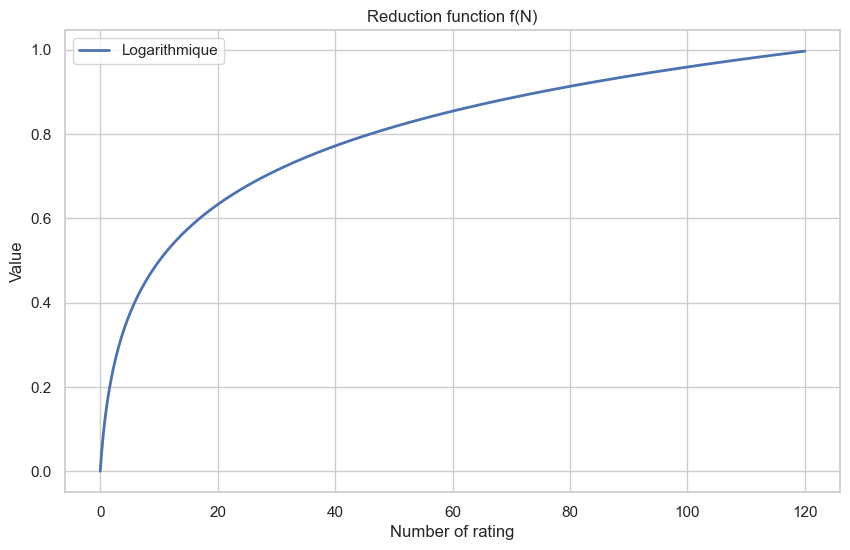

In [21]:
importlib.reload(section_3_data_refinement)
from section_3_data_refinement import show_reduction_function

show_reduction_function(max_stability_threshold)

In [22]:
from section_3_data_refinement import logarithmic

# compute the R, N for each beer
R = USA_data.groupby('beer_id')['rating'].mean()
N = USA_data.groupby('beer_id')['rating'].size()

# compute the score for each beer
score = R * logarithmic(N, max_stability_threshold)

# adding the score to ratings dataframe
USA_data['preference_score'] = USA_data['beer_id'].map(score)

# creating a dataframe of beer preferences
beer_preference = pd.DataFrame({'Score': score, 'Average Rating': R, 'Number of ratings': N})
beer_preference_sorted = beer_preference.sort_values(by='Score', ascending=False)

# display the 5 best beers
beer_preference_sorted.head(5)

,Score,Average Rating,Number of ratings
beer_id,,,
78820,4.826605,4.826605,542
62397,4.805921,4.805921,1221
136936,4.784807,4.784807,961
91693,4.752087,4.752087,230
87846,4.748750,4.748750,712


## 4. US Politics external datasets processing

As we saw before, the majority of the ratings came from the USA for both websites. Thus, the first analysis will be on US politics.

### 4.1 Data loading

Loading the external data concerning the politic oriantation of states over the years.

In [23]:
# create a dataframe containing the number of votes for each candidate for each US state
us_pres_df = pd.read_csv('./data/US president/1976-2020-president.csv')
us_pres_df = us_pres_df.loc[us_pres_df.year > 1998].reset_index()

# get the % of vote
us_pres_df['vote_percent'] = us_pres_df['candidatevotes'] / us_pres_df['totalvotes'] * 100

# print to get a look
us_pres_df.head(2)

,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,vote_percent
0,2042,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,941173,1666272,20210113,NaN,REPUBLICAN,56.483755
1,2043,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"GORE, AL",DEMOCRAT,False,692611,1666272,20210113,NaN,DEMOCRAT,41.566503


> Here we can see that there are multiple candidates for the elections which means that we won't be able to take 100% of the votes because we will only be considering Republican votes or Democrat votes.

### 4.2 Computing Republicans score percentage by state/year

In [24]:
# extract only the republican results
republican_score = us_pres_df.loc[us_pres_df['party_simplified'] == 'REPUBLICAN'].copy().reset_index()

# create a dataframe with row=states and column=election year.
rep_year_score_df = republican_score.pivot_table(index = 'state_po', columns = 'year', values = 'vote_percent', aggfunc = 'sum')

#useful for following part
rep_year_ = republican_score.pivot_table(index = ('state_po', 'state'), columns = 'year', values = 'vote_percent', aggfunc = 'sum')

# add a column with average percent result over 2000-2020
rep_year_score_df['Average'] = rep_year_score_df.mean(axis = 1)
rep_year_['Average'] = rep_year_.mean(axis = 1)
rep_year_ = rep_year_.sort_values(by = 'Average', ascending = False)

# display the top 5 most republican states over 6 elections
rep_year_score_df.sort_values(by = 'Average', ascending = False).head(5)

year,2000,2004,2008,2012,2016,2020,Average
state_po,,,,,,,
WY,69.222743,68.739569,64.713775,68.193585,67.398411,69.499790,67.961312
OK,60.307852,65.570402,65.645081,66.772320,65.322865,65.373272,64.831965
ID,67.170439,68.390945,61.517091,64.529783,59.261432,63.837565,64.117876
UT,66.830143,71.535948,62.583870,72.790533,45.540817,58.129839,62.901858
AL,56.483755,62.460690,60.316913,60.545822,62.083092,62.031643,60.653653


> We observe that the states that vote much more republican than democrat are Wyoming, Oklahoma,Idaho, Utah and Alabama

### 4.3 Computing Democrats score percentage by state/year

In [25]:
# extract only the democrat results
democrat_score = us_pres_df.loc[us_pres_df['party_simplified'] == 'DEMOCRAT'].copy().reset_index()

# create a dataframe with row=states and column=election year.
dem_year_score_df = democrat_score.pivot_table(index = 'state_po', columns = 'year', values = 'vote_percent',aggfunc = 'sum')

# doing some preprocessing
dem_year_ = democrat_score.pivot_table(index = ('state_po', 'state'), columns = 'year', values = 'vote_percent',aggfunc = 'sum')
dem_year_['Average'] = dem_year_.mean(axis = 1)
dem_year_ = dem_year_.sort_values(by = 'Average', ascending = False)

# add a column with average percent result over 2000-2020
dem_year_score_df['Average'] = dem_year_score_df.mean(axis = 1)

# display the top 5 most democrat states over 6 elections
dem_year_score_df.sort_values(by = 'Average', ascending = False).head(10)

year,2000,2004,2008,2012,2016,2020,Average
state_po,,,,,,,
DC,85.155081,89.183869,92.457110,90.913114,90.483884,92.149694,90.057125
HI,55.791668,54.009552,71.452910,70.147932,60.980798,63.149380,62.588707
MA,59.126126,61.616660,61.363199,60.338308,59.050065,65.122984,61.102890
VT,50.634709,58.937463,67.455683,66.570550,55.722742,65.455781,60.796155
MD,56.488308,55.971761,61.919345,61.974191,60.328549,65.360665,60.340470
RI,60.987700,59.423426,62.864005,62.700959,54.406607,59.476199,59.976483
CA,53.449737,54.305558,61.012638,60.238959,61.726400,63.483947,59.036206
NY,56.639270,56.130581,60.156962,60.760984,56.136143,60.391885,58.369304
CT,55.909628,54.313709,60.588830,58.085013,54.566301,59.260732,57.120702


> We notice that the states that vote much more democrat than republican are DC, Hawaii, Massachusetts, Vermont and Maryland

### 4.4 Other parties score percentage by state/year

In [26]:
# extract only the other results
other_score = us_pres_df.loc[us_pres_df['party_simplified'] == 'OTHER'].copy().reset_index()

# create a dataframe with row=states and column=election year.
other_year_score_df = other_score.pivot_table(index = 'state_po', columns = 'year', values = 'vote_percent', aggfunc = 'sum', fill_value = 0)

# add a column with average percent result over 2000-2020
other_year_score_df['Average'] = other_year_score_df.mean(axis = 1)

# display the top 5 of the states that vote for independant candidates
other_year_score_df.sort_values(by = 'Average', ascending = False).head()

year,2000,2004,2008,2012,2016,2020,Average
state_po,,,,,,,
NY,10.801017,6.027054,8.272034,7.335715,10.737016,1.451418,7.437376
UT,6.355984,2.104664,2.278946,1.224151,23.496863,1.640810,6.183570
AK,12.789606,2.881976,2.198978,1.925822,6.290489,1.920285,4.667859
VT,8.401742,1.908366,1.766827,1.291724,11.373090,3.190572,4.655387
ME,6.470528,1.585416,1.910244,3.011212,5.241536,2.214643,3.405597


> New york and Utah are the only two states where the other parties make more than 5% on average

### 4.5 Computing difference in voting percentage

In [27]:
# create a dataframe of percent difference in results between democrats and republican.
# positive indicates republican perform better, negative indicates democrats perform better
delta_df = rep_year_score_df - dem_year_score_df

# add a column of average difference over the years
delta_df['Average'] = delta_df.mean(axis = 1)

# display it
delta_df.head()


year,2000,2004,2008,2012,2016,2020,Average
state_po,,,,,,,
AK,30.954615,25.548468,21.535146,13.988918,14.730641,10.061191,19.469830
AL,14.917252,25.616287,21.576479,22.186789,27.725147,25.461653,22.913935
AR,5.442941,9.758329,19.851245,23.687946,26.920978,27.620668,18.880351
AZ,6.286553,10.472601,8.519997,9.064766,3.543962,-0.308710,6.263195
CA,-11.798240,-9.947862,-24.057780,-23.118581,-30.109293,-29.163223,-21.365830


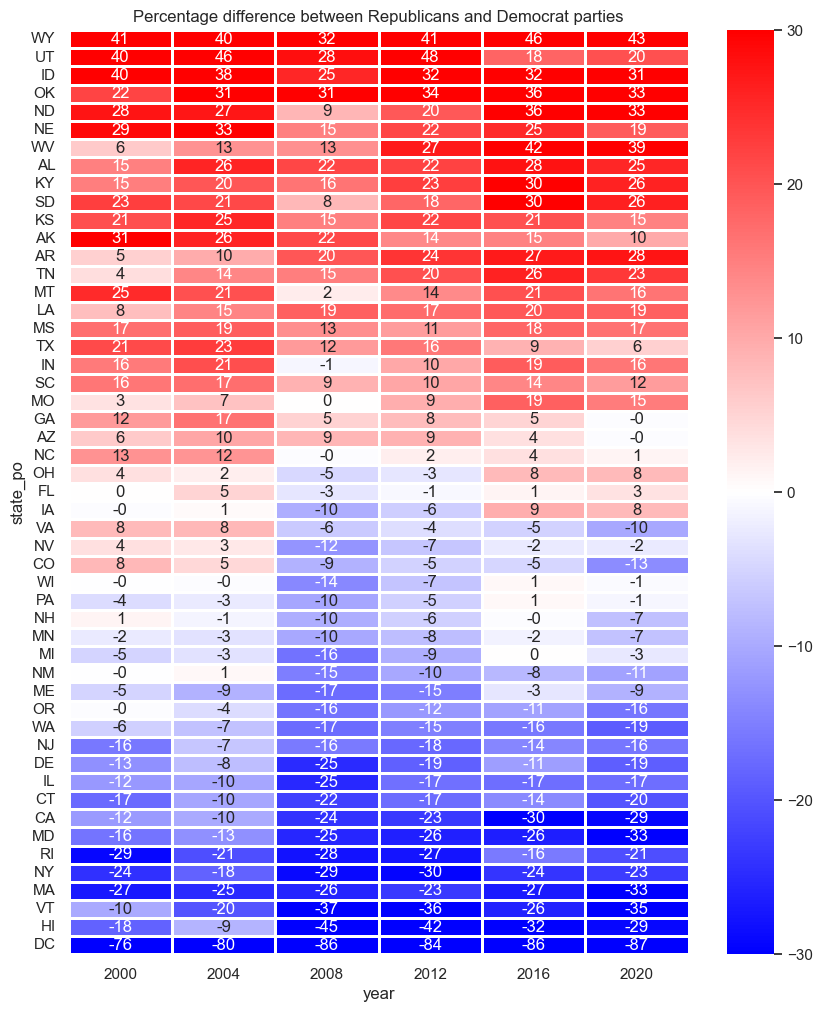

In [28]:
# display heatmap showing the percentages of voters for republicans (red) and democrats (blue) for each state for each election year
plt.figure(figsize = (10, 12))
sns.heatmap(data = delta_df.sort_values(by = 'Average', ascending = False).drop('Average', axis = 1),linewidths = 0.8, cmap = 'bwr', vmax = 30, vmin = -30, center = 0, annot = True, fmt = '.0f').set_title('Percentage difference between Republicans and Democrat parties');

Here, we can identify three top 5 :

    - Top 5 most Republican states
    - Top 5 most Democrat states
    - Top 5 most swing states (states that hesitate the most for which parti to vote for)

In [29]:
# top 10 most republican states
rep_df = rep_year_score_df.sort_values(by = 'Average', ascending = False).head(10)

# top 10 most democrat states
dem_df = dem_year_score_df.sort_values(by = 'Average', ascending = False).head(10)

## 5. Analysis : Beer ratings vs Political oriantations

### 5.1 US states' prefered consumption type

In this section we will try to determine if the users are consuming beers :
- Locally (from a brewery in its own state)
- Nationally (US brewery)
- Internationnally (foreign brewery)

In [30]:
from section_5_analysis import compute_consumtion_type_states_preferances

# Addind a column which type of consumation is the ratings about
BA_usa['consumption_type'] = BA_usa.apply(lambda a: 'Local' if a['user_state'] == a['breweries_state'] else 'National' if a['breweries_country'] == 'United States' else 'International', axis = 1)

# Computing the consumtion type preferances by states.
loc_pref, nat_pref, interl_pref = compute_consumtion_type_states_preferances(BA_usa)

# Sorting to obtain the top state by consumtion type
top_local_states = loc_pref.sort_values(by = 'percentage', ascending = False)
top_national_states = nat_pref.sort_values(by = 'percentage', ascending = False)
top_international_states = interl_pref.sort_values(by = 'percentage', ascending = False)

# print the result for each consumption type
print("Top States for Local Consumption:")
display(top_local_states.head(10))

print("\nTop States for National Consumption:")
display(top_national_states.head(10))

print("Top States for International Consumption:")
display(top_international_states.head(10))

Top States for Local Consumption:


,user_state,consumption_type,count,consumption_type_avg_rating,percentage,state_avg_rating
13,California,Local,310590,4.013138,47.192517,3.937877
64,Michigan,Local,96256,3.906939,39.538953,3.878540
16,Colorado,Local,51669,3.863897,30.233647,3.894112
109,Oregon,Local,30013,3.957360,29.695555,3.892649
133,Vermont,Local,13752,4.089329,27.912075,3.988573
145,Wisconsin,Local,41211,3.793487,25.188250,3.908788
61,Massachusetts,Local,95329,3.966318,23.017600,3.941462
127,Texas,Local,80710,3.822031,22.152689,3.859031
67,Minnesota,Local,49311,3.941209,22.112259,3.915058
73,Missouri,Local,24812,3.823838,21.740311,3.876056



Top States for National Consumption:


,user_state,consumption_type,count,consumption_type_avg_rating,percentage,state_avg_rating
143,West Virginia,National,20744,3.860203,83.537371,3.849827
101,North Dakota,National,6518,3.820578,83.265202,3.808751
122,South Dakota,National,9491,3.752631,81.064230,3.747754
149,Wyoming,National,8879,3.842253,80.600944,3.819800
116,Rhode Island,National,38217,3.945210,80.424672,3.927720
11,Arkansas,National,15068,3.858926,80.349811,3.852688
47,Kansas,National,42168,3.841793,79.915097,3.824732
92,New Mexico,National,21153,3.885466,79.346562,3.878611
83,Nevada,National,19971,3.865753,79.268874,3.832599
23,Delaware,National,21341,3.945878,79.146269,3.934213


Top States for International Consumption:


,user_state,consumption_type,count,consumption_type_avg_rating,percentage,state_avg_rating
51,Louisiana,International,8546,3.843517,20.657981,3.872486
30,Hawaii,International,1618,3.754951,20.499176,3.844589
3,Alaska,International,2885,3.904731,20.459542,3.939769
105,Oklahoma,International,5877,3.809845,17.526542,3.861029
129,Utah,International,1395,3.684753,17.355063,3.831079
48,Kentucky,International,16139,3.816767,17.317453,3.867352
81,Nevada,International,4276,3.695634,16.972295,3.832599
0,Alabama,International,6876,3.748634,16.298860,3.825246
33,Idaho,International,2870,3.540261,15.627552,3.748051
78,Nebraska,International,4147,3.830068,15.553972,3.878574


> We observe that most of the states consume more than 80% of national production, and that the state with the highest local consumption accounts for between 30% and 40% of their total consumption. We will use these results further when analyzing the political orientations of the different states.

### 5.2 US states and their prefered beer characteristics preferences vs Rep/Dem


In following section, we use BeerAdvocate (BA) Dataframe because it's the most suitable for this analysis with its high majority of users's ratings that comes from USA (~87%).

#### 5.2.1 Top Beer Styles by State

For this primary analysis, we will only focus our observations on the 10 most republican and democrats states.

In [31]:
from section_5_analysis import top_n_rep_dem

# Compute the top n republican/democrat states.
topn_democrat, topn_republican = top_n_rep_dem(10, dem_year_, dem_year_score_df, rep_year_, rep_year_score_df)

In [32]:
# Democrats States
pd_top5_democrat = pd.DataFrame({
    'Top 5':np.arange(1, 6)
})
pd_top5_democrat_rating = pd.DataFrame({
    'Top 5':np.arange(1, 6)
})
for state in topn_democrat:
    BA_state = BA_usa.copy()[BA_usa['user_state'] == str(state)]
    # keep the beer if it has at leat 10 ratings
    counts = BA_state.groupby('beer_id')['rating'].transform('count')
    BA_state = BA_state[counts >= 10]
    #Take the top5 beer styles depending on ratings for each state
    top5_state = BA_state[['beer_name', 'beer_style', 'breweries_location', 'rating']].groupby(['beer_style']).agg({'rating': 'mean'}).sort_values('rating', ascending = False)[:5]
    pd_top5_democrat[state] = top5_state.index #add beer styles
    #Insert in the df
    pd_top5_democrat_rating[state] = top5_state.index
    pd_top5_democrat_rating[state + '_rating'] = top5_state['rating'].values #add ratings of beer_styles


# Republican States
pd_top5_republican = pd.DataFrame({
    'Top 5':np.arange(1,6)
})
pd_top5_republican_rating = pd.DataFrame({
    'Top 5':np.arange(1,6)
})
for state in topn_republican:
    BA_state = BA_usa.copy()[BA_usa['user_state'] == str(state)]
    # keep the beer if it has at leat 10 ratings
    counts = BA_state.groupby('beer_id')['rating'].transform('count')
    BA_state = BA_state[counts >= 10]
    #Take the top5 beer styles depending on ratings for each state
    top5_state = BA_state[['beer_name', 'beer_style', 'breweries_location', 'rating']].groupby(['beer_style']).agg({'rating': 'mean'}).sort_values('rating', ascending = False)[:5]
    pd_top5_republican[state] = top5_state.index
    #Insert in the df
    pd_top5_republican_rating[state] = top5_state.index
    pd_top5_republican_rating[state +'_rating'] = top5_state['rating'].values

In [33]:
display(pd_top5_republican)
display(pd_top5_democrat)

,Top 5,Wyoming,Oklahoma,Idaho,Utah,Alabama,West Virginia,North Dakota,Nebraska,Kentucky,South Dakota
0,1,American Double / Imperial Stout,American Double / Imperial Stout,Quadrupel (Quad),Quadrupel (Quad),Weizenbock,Quadrupel (Quad),American Double / Imperial Stout,English Stout,American Double / Imperial Stout,Russian Imperial Stout
1,2,American Stout,Berliner Weissbier,Tripel,American Double / Imperial Stout,Quadrupel (Quad),American Wild Ale,Flanders Oud Bruin,American Double / Imperial Stout,Lambic - Unblended,American Double / Imperial Stout
2,3,American Double / Imperial IPA,Quadrupel (Quad),Russian Imperial Stout,American Strong Ale,American Wild Ale,American Double / Imperial Stout,American Barleywine,American Wild Ale,Gueuze,Belgian Strong Dark Ale
3,4,American Porter,Russian Imperial Stout,American Double / Imperial Stout,Russian Imperial Stout,Gueuze,English Porter,American Double / Imperial IPA,Quadrupel (Quad),Lambic - Fruit,Oatmeal Stout
4,5,American Barleywine,Weizenbock,Saison / Farmhouse Ale,American Brown Ale,American Double / Imperial Stout,Russian Imperial Stout,Quadrupel (Quad),Weizenbock,Quadrupel (Quad),Quadrupel (Quad)


,Top 5,Hawaii,Massachusetts,Vermont,Maryland,Rhode Island,California,New York,Connecticut,Illinois,Delaware
0,1,American Double / Imperial Stout,American Double / Imperial Stout,Lambic - Unblended,Gueuze,Gueuze,Gueuze,Gueuze,Gueuze,Gueuze,American Wild Ale
1,2,Doppelbock,Gueuze,Gueuze,Quadrupel (Quad),Lambic - Unblended,American Double / Imperial Stout,American Double / Imperial Stout,American Double / Imperial Stout,American Double / Imperial Stout,Gueuze
2,3,American Double / Imperial IPA,American Double / Imperial IPA,American Wild Ale,American Double / Imperial Stout,American Double / Imperial Stout,American Wild Ale,Lambic - Fruit,Lambic - Fruit,English Barleywine,American Double / Imperial Stout
3,4,Tripel,Eisbock,Lambic - Fruit,Eisbock,Quadrupel (Quad),English Barleywine,Quadrupel (Quad),American Double / Imperial IPA,Russian Imperial Stout,Quadrupel (Quad)
4,5,Russian Imperial Stout,Lambic - Fruit,American Double / Imperial IPA,Flanders Red Ale,American Wild Ale,Russian Imperial Stout,American Double / Imperial IPA,Flanders Red Ale,Quadrupel (Quad),Flanders Red Ale


In [34]:
# add weight in counts, from top1 to top5 : weights = [5,4,3,2,1]
x = pd.Series(dtype='int')  # Initialize empty Series with dtype
for i in range(pd_top5_republican.shape[0]):
    weight = 5 - i
    counts = pd_top5_republican.drop(['Top 5'], axis=1).loc[i].value_counts() * weight
    x = pd.concat([x, counts])

y = pd.Series(dtype='int')  # Initialize empty Series with dtype
for i in range(pd_top5_democrat.shape[0]):
    weight = 5 - i
    counts = pd_top5_democrat.drop(['Top 5'], axis=1).loc[i].value_counts() * weight
    y = pd.concat([y, counts])

x = x.groupby(x.index).sum().sort_values(ascending=False)
y = y.groupby(y.index).sum().sort_values(ascending=False)

rep_top = pd.DataFrame({
    'Beer styles': x.index,
    'Weighted count': x.values,
})
dem_top = pd.DataFrame({
    'Beer styles': y.index,
    'Weighted count': y.values,
})

rep_top['State type'] = 'Republican'
dem_top['State type'] = 'Democrat'


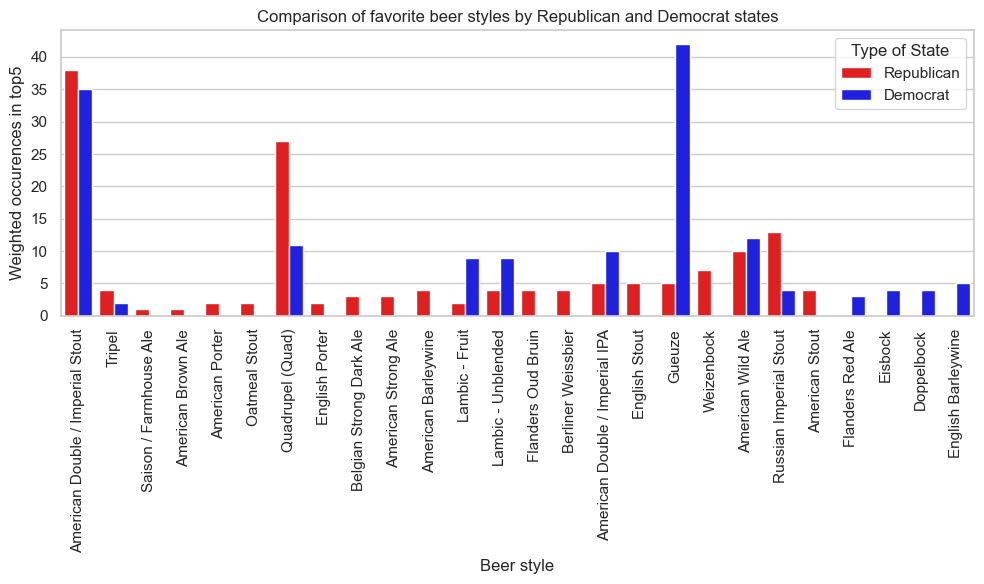

In [35]:
df_combined = pd.concat([rep_top,dem_top]).sort_values(by = ['State type'],ascending=False)
# create graphic
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Beer styles', y = 'Weighted count', hue = 'State type', data = df_combined, palette = {'Democrat': 'blue', 'Republican': 'red'})

# add labels and titles
plt.title('Comparison of favorite beer styles by Republican and Democrat states')
plt.xlabel('Beer style')
plt.ylabel('Weighted occurences in top5')
plt.xticks(rotation = 90)  # rotate for better readability
plt.legend(title = 'Type of State')

# display graphic
plt.tight_layout()
plt.show()

In [36]:
# create a list with all styles that are in the top 5 beer style for each state
styles_rep = []
styles_dem = []
for col in topn_republican:
    styles_rep.append(list(pd_top5_republican[col].values))
styles_rep = [item for sous_liste in styles_rep for item in sous_liste]
styles_rep = list(set(styles_rep))

for col in topn_democrat:
    styles_dem.append(list(pd_top5_democrat[col].values))
styles_dem = [item for sous_liste in styles_dem for item in sous_liste]
styles_dem = list(set(styles_dem))

# keep the values that need to be added

styles = list(set(styles_dem + styles_rep))
print(len(styles))

26


In [37]:
# add the style from top5 republican to democrat and vice versa (for the plot)

# democrats States
pd_top_democrat_rating = pd.DataFrame({
    'Top 5':np.arange(1, len(styles) + 6)
})
for state in topn_democrat:
    BA_state = BA_usa.copy()[BA_usa['user_state'] == str(state)]
    # keep the beer if it has at least 10 ratings
    counts = BA_state.groupby('beer_id')['rating'].transform('count')
    BA_state = BA_state[counts >= 10]
    # take the top5 beer styles depending on ratings for each state
    top_state = BA_state[['beer_name', 'beer_style', 'breweries_location', 'rating']].groupby(['beer_style']).agg({'rating': 'mean'}).sort_values('rating', ascending = False)
    # check that every style has ratings on it, else add it with None for the mean ratings
    for style in styles:
        if style in top_state.index:
            pass
        else:
            top_state.loc[style] = None
    top_state = pd.concat([top_state.head(5), top_state.loc[styles]])
    # add beer styles
    pd_top_democrat_rating[state] = top_state.index
    # add ratings of beer_styles
    pd_top_democrat_rating[state + '_rating'] = top_state['rating'].values 


# Republican States
pd_top_republican_rating = pd.DataFrame({
    'Top 5':np.arange(1, len(styles) + 6)
})
for state in topn_republican:
    BA_state = BA_usa.copy()[BA_usa['user_state'] == str(state)]
    # keep the beer if it has at leat 10 ratings
    counts = BA_state.groupby('beer_id')['rating'].transform('count')
    BA_state = BA_state[counts >= 10]
    # take the top5 beer styles depending on ratings for each state
    top_state = BA_state[['beer_name', 'beer_style', 'breweries_location', 'rating']].groupby(['beer_style']).agg({'rating': 'mean'}).sort_values('rating', ascending = False)
    # check that every style has ratings on it, else add it with None for the mean ratings
    for style in styles:
        if style in top_state.index:
            pass
        else:
            top_state.loc[style] = None
    top_state = pd.concat([top_state.head(5), top_state.loc[styles]])
    # add beer styles
    pd_top_republican_rating[state] = top_state.index
    # add ratings of beer_styles
    pd_top_republican_rating[state + '_rating'] = top_state['rating'].values

In [38]:
# List with strings of form : state+'_rating'

to_leave_rep = topn_republican + ['Top 5']
to_leave_dem = topn_democrat + ['Top 5']
list_rep_rating = [item for item in list(pd_top_republican_rating.columns) if item not in to_leave_rep]
list_dem_rating = [item for item in list(pd_top_democrat_rating.columns) if item not in to_leave_dem]

In [39]:
# new long format to plot
republican_long = pd.melt(pd_top_republican_rating, id_vars = ['Top 5'], value_vars = topn_republican, var_name = 'State', value_name = 'Beer style')
democrat_long = pd.melt(pd_top_democrat_rating, id_vars = ['Top 5'], value_vars = topn_democrat, var_name = 'State', value_name = 'Beer style')

# create a new column rating
republican_long['Rating'] = pd.melt(pd_top_republican_rating, id_vars = ['Top 5'], value_vars = list_rep_rating, var_name = 'State_rating', value_name = 'Rating')['Rating']
democrat_long['Rating'] = pd.melt(pd_top_democrat_rating, id_vars = ['Top 5'], value_vars = list_dem_rating, var_name = 'State_rating', value_name = 'Rating')['Rating']

# add column 'state type'
republican_long['State type'] = 'Republican'
democrat_long['State type'] = 'Democrat'


# combine the dfs
df_combined = pd.concat([republican_long, democrat_long])
#display(df_combined[60:120])
df_combined = df_combined.drop_duplicates(subset = ('State', 'Beer style'))

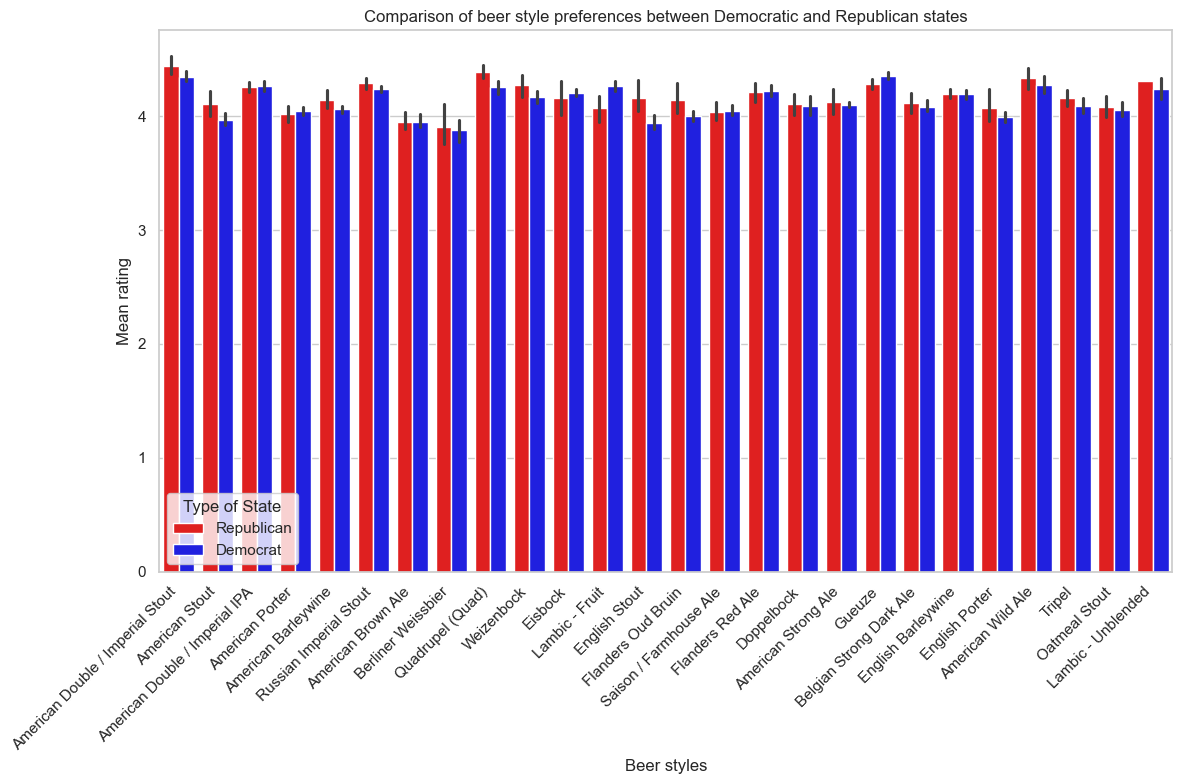

In [40]:
df_combined = df_combined.dropna(subset=['Beer style', 'Rating', 'State type'])

# create graphic
plt.figure(figsize = (12, 8))
sns.barplot(data = df_combined, x = 'Beer style', y = 'Rating', hue = 'State type', palette = {'Democrat': 'blue', 'Republican': 'red'})

# personnalise the graphic
plt.title('Comparison of beer style preferences between Democratic and Republican states')
plt.xlabel('Beer styles')
plt.ylabel('Mean rating')
plt.xticks(rotation = 45, ha = 'right') 
plt.legend(title = 'Type of State')

# display graphic
plt.tight_layout()
plt.show()

In [41]:
### The Lambic Unblended doesn't have a lot of reviews for republican states.
# Why not analyze the popularity then, i.e nb of reviews ? 
df_test_rep = BA_usa[BA_usa['user_state'].isin(topn_republican)]
df_test_dem = BA_usa[BA_usa['user_state'].isin(topn_democrat)]
# df_test_rep[df_test_rep['beer_style']=='American Double / Imperial IPA']
print('Mean rating for Republican states\n', df_test_rep.groupby('beer_style').agg({'rating':'count'}).loc['Lambic - Unblended'],'\n')
print('Mean rating for Democrat states\n', df_test_dem.groupby('beer_style').agg({'rating':'count'}).loc['Lambic - Unblended'])

Mean rating for Republican states
 rating    164
Name: Lambic - Unblended, dtype: int64 

Mean rating for Democrat states
 rating    2295
Name: Lambic - Unblended, dtype: int64


In [42]:
# All beer styles in top 7 count for all states
rep_styles =[]
dem_styles =[]

for state in topn_democrat:
    BA_state = BA_usa.copy()[BA_usa['user_state'] == str(state)]    
    top_state_count = BA_state[['beer_name', 'beer_style', 'breweries_location', 'rating']].groupby(['beer_style']).agg({'rating': 'count'}).sort_values('rating', ascending = False)
    top5_style = list(top_state_count.head(7).index)
    dem_styles.append(top5_style)
for state in topn_republican:
    BA_state = BA_usa.copy()[BA_usa['user_state'] == str(state)]
    top_state_count = BA_state[['beer_name', 'beer_style', 'breweries_location', 'rating']].groupby(['beer_style']).agg({'rating': 'count'}).sort_values('rating', ascending = False)
    top5_style = list(top_state_count.head(7).index)
    rep_styles.append(top5_style)

dem_styles = [item for sous_liste in dem_styles for item in sous_liste]
rep_styles = [item for sous_liste in rep_styles for item in sous_liste]

styles = list(set(rep_styles + dem_styles))
print(styles)

['American Pale Ale (APA)', 'American Wild Ale', 'Saison / Farmhouse Ale', 'American Double / Imperial Stout', 'Fruit / Vegetable Beer', 'American Amber / Red Ale', 'American Double / Imperial IPA', 'Russian Imperial Stout', 'American Porter', 'American IPA']


In [43]:
# democrats States

pd_top_democrat_count = pd.DataFrame({
    'Top 5':np.arange(1, len(styles) + 8)
})
for state in topn_democrat:
    BA_state = BA_usa.copy()[BA_usa['user_state'] == str(state)]    
    top_state_count = BA_state[['beer_name', 'beer_style', 'breweries_location', 'rating']].groupby(['beer_style']).agg({'rating': 'count'}).sort_values('rating', ascending = False)
    #Add top 7 beer style depending on count + the other styles from other states
    top_state_count = pd.concat([top_state_count.head(7), top_state_count.loc[styles]])
    #add beer styles
    pd_top_democrat_count[state] = top_state_count.index
    pd_top_democrat_count[state + '_count'] = top_state_count['rating'].values #add ratings of beer_styles


# Republican States

pd_top_republican_count = pd.DataFrame({
    'Top 5':np.arange(1, len(styles) + 8)
})
for state in topn_republican:
    BA_state = BA_usa.copy()[BA_usa['user_state'] == str(state)]
    
    top_state_count = BA_state[['beer_name', 'beer_style', 'breweries_location', 'rating']].groupby(['beer_style']).agg({'rating': 'count'}).sort_values('rating', ascending = False)
    #Add top 7 beer style depending on count + the other styles from other states    
    top_state_count = pd.concat([top_state_count.head(7), top_state_count.loc[styles]])
    #add beer styles
    pd_top_republican_count[state] = top_state_count.index
    pd_top_republican_count[state + '_count'] = top_state_count['rating'].values

In [44]:
#List with strings of form : state+'_count'
list_rep_count = [item for item in list(pd_top_republican_count.columns) if item not in to_leave_rep]
list_dem_count = [item for item in list(pd_top_democrat_count.columns) if item not in to_leave_dem]

In [45]:
#percentage of pop because imbalance in data
for state in topn_republican:
    pd_top_republican_count[state + '_count'] = pd_top_republican_count[state + '_count'] / pd_top_republican_count[state + '_count'].sum()
for state in topn_democrat:
    pd_top_democrat_count[state + '_count'] = pd_top_democrat_count[state + '_count'] / pd_top_democrat_count[state + '_count'].sum()

In [46]:
# new long format to plot
republican_long = pd.melt(pd_top_republican_count, id_vars = ['Top 5'], value_vars = topn_republican, var_name = 'State', value_name = 'Beer style')
democrat_long = pd.melt(pd_top_democrat_count, id_vars = ['Top 5'], value_vars = topn_democrat, var_name = 'State', value_name = 'Beer style')

# create a new column rating
republican_long['Count'] = pd.melt(pd_top_republican_count, id_vars = ['Top 5'], value_vars = list_rep_count, var_name = 'State_rating', value_name = 'Count of rating')['Count of rating']
democrat_long['Count'] = pd.melt(pd_top_democrat_count, id_vars = ['Top 5'], value_vars = list_dem_count, var_name = 'State_rating', value_name = 'Count of rating')['Count of rating']

# add column 'state type'
republican_long['State type'] = 'Republican'
democrat_long['State type'] = 'Democrat'


# combine the dfs
df_combined = pd.concat([republican_long, democrat_long])
df_combined = df_combined.drop_duplicates(subset = ('State', 'Beer style'))

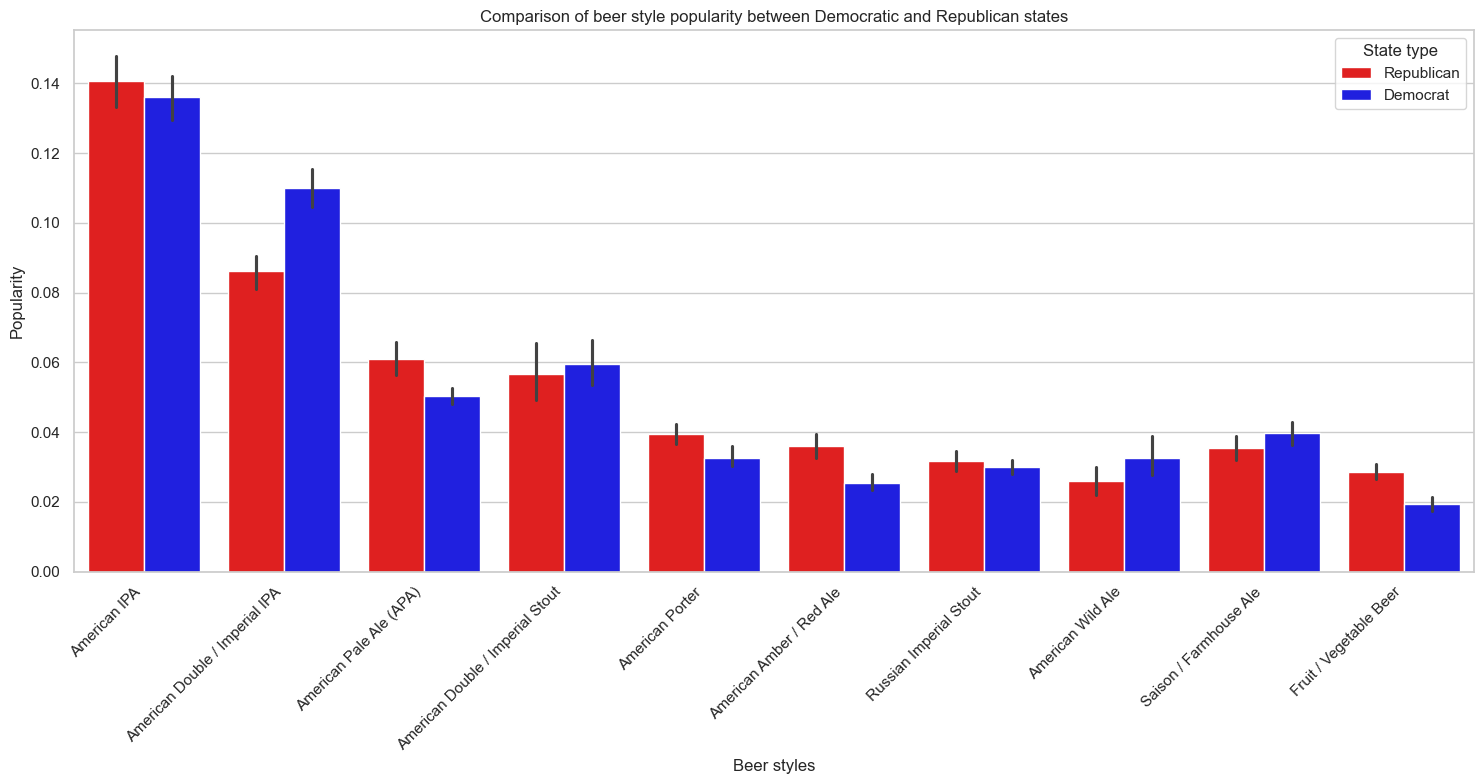

In [47]:
# Create the graph
plt.figure(figsize = (15, 8))
sns.barplot(data = df_combined, x = 'Beer style', y = 'Count', hue = 'State type', palette = {'Democrat': 'blue', 'Republican': 'red'})

# Title + labels
plt.title('Comparison of beer style popularity between Democratic and Republican states')
plt.xlabel('Beer styles')
plt.ylabel('Popularity')
plt.xticks(rotation = 45, ha = 'right')  # Rotation des labels de l'axe x pour meilleure lisibilité
plt.legend(title = 'State type')

# Plot
plt.tight_layout()
plt.show()

> *Only small differences in beer popularity, except for American Double/ Imperial IPA*

#### 5.2.2 Average Alcohol % in Top Beers

Let's try to compare the preference in alcool percentage. 

The goal is to compute the mean beer_abv for the top 10 beer of each state.

In [48]:
# democrats States
pd_top_democrat_abv = pd.DataFrame({'Top 5':np.arange(1, 6)})

for state in topn_democrat:
    BA_state = BA_usa.copy()[BA_usa['user_state'] == str(state)]
    # keep the beer if it has at leat 10 ratings
    counts = BA_state.groupby('beer_id')['rating'].transform('count')
    BA_state = BA_state[counts >= 10]
    #Drop rows if missing values on beer_abv
    BA_state = BA_state.dropna(axis = 0,subset = ['beer_abv'])
    top_state_abv = BA_state[['beer_name', 'beer_style', 'beer_abv', 'rating']].groupby(['beer_name']).agg({'rating': 'mean', 'beer_abv': 'first'}).sort_values('rating', ascending = False)[:5]
    #add beer names
    pd_top_democrat_abv[state] = top_state_abv.index
    pd_top_democrat_abv[state + '_abv'] = top_state_abv['beer_abv'].values #add avg of beer_name


# Republican States
pd_top_republican_abv = pd.DataFrame({'Top 5':np.arange(1,6)})

for state in topn_republican:
    BA_state = BA_usa.copy()[BA_usa['user_state'] == str(state)]
    # keep the beer if it has at leat 10 ratings
    counts = BA_state.groupby('beer_id')['rating'].transform('count')
    BA_state = BA_state[counts >= 10]
    #Drop rows if missing values on beer_abv
    BA_state = BA_state.dropna(axis = 0,subset = ['beer_abv'])
    top_state_abv = BA_state[['beer_name', 'beer_style', 'beer_abv', 'rating']].groupby(['beer_name']).agg({'rating': 'mean','beer_abv': 'first'}).sort_values('rating', ascending = False)[:5]
    #add beer names
    pd_top_republican_abv[state] = top_state_abv.index
    pd_top_republican_abv[state + '_abv'] = top_state_abv['beer_abv'].values #add avg of beer_name


In [49]:
list_rep_abv = [item for item in list(pd_top_republican_abv.columns) if item not in to_leave_rep]
list_dem_abv = [item for item in list(pd_top_democrat_abv.columns) if item not in to_leave_dem]

In [50]:
# new long format to plot
republican_long = pd.melt(pd_top_republican_abv, id_vars = ['Top 5'], value_vars = topn_republican, var_name = 'State', value_name = 'Beer name')
democrat_long = pd.melt(pd_top_democrat_abv, id_vars = ['Top 5'], value_vars = topn_democrat, var_name = 'State', value_name = 'Beer name')

# create a new column rating
republican_long['Beer abv'] = pd.melt(pd_top_republican_abv, id_vars = ['Top 5'], value_vars = list_rep_abv, var_name = 'State_rating', value_name = 'abv')['abv']
democrat_long['Beer abv'] = pd.melt(pd_top_democrat_abv, id_vars = ['Top 5'], value_vars = list_dem_abv, var_name = 'State_rating', value_name = 'abv')['abv']

# add column 'state type'
republican_long['State type'] = 'Republican'
democrat_long['State type'] = 'Democrat'


# combine the dfs
df_combined = pd.concat([republican_long, democrat_long])

2.0 % of difference in median


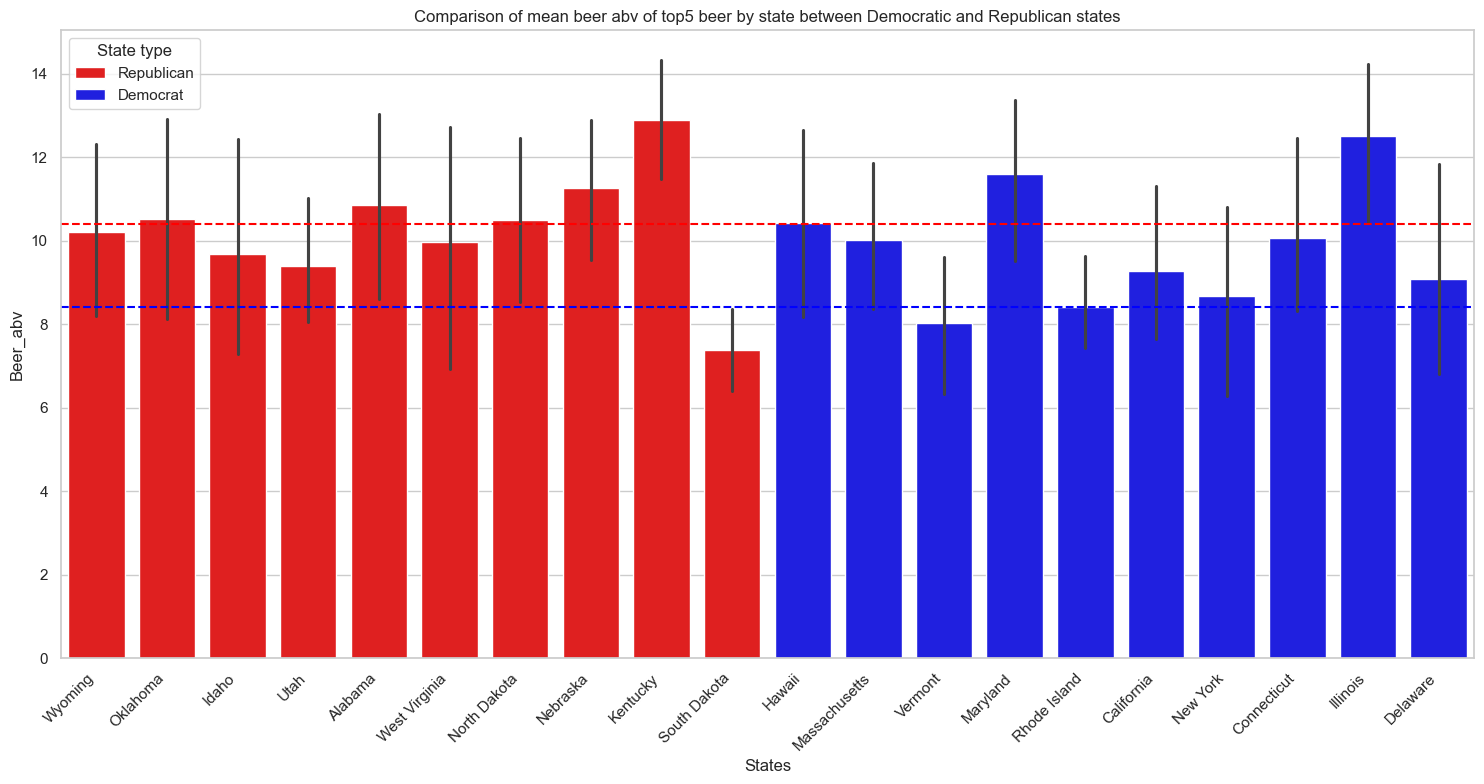

In [51]:
# Create graphic
plt.figure(figsize = (15, 8))
sns.barplot(data = df_combined, x = 'State', y = 'Beer abv', hue = 'State type', palette = {'Democrat': 'blue', 'Republican': 'red'})
median_rep = df_combined[df_combined['State type'] == 'Republican']['Beer abv'].median()
median_dem = df_combined[df_combined['State type'] == 'Democrat']['Beer abv'].median()
print(round(abs(median_dem - median_rep), 2), '% of difference in median')
plt.axhline(y = median_rep, color = 'red', linestyle = '--')
plt.axhline(y = median_dem, color = 'blue', linestyle = '--')
# personnalize graphic
plt.title('Comparison of mean beer abv of top5 beer by state between Democratic and Republican states')
plt.xlabel('States')
plt.ylabel('Beer_abv')
plt.xticks(rotation = 45, ha = 'right')  # rotate labels for better readability
plt.legend(title = 'State type')

# display
plt.tight_layout()
plt.show()

### 5.3 On verra

In [81]:
# Convertir la colonne 'rating_date' en format datetime
USA_data['rating_date'] = pd.to_datetime(USA_data['rating_date'], format='%m-%Y')
filtered_USA_data = USA_data.filter(items=['rating_date', 'user_state', 'beer_abv'])

# Définir les plages de dates
periods = [
    ('11-2006', '10-2010'),
    ('11-2010', '10-2014'),
    ('11-2014', '10-2018')
]

# Convertir les plages en datetime
periods = [(pd.to_datetime(start, format='%m-%Y'), pd.to_datetime(end, format='%m-%Y')) for start, end in periods]

# Filtrer et stocker les DataFrames dans une liste
split_dataframes = []
for start_date, end_date in periods:
    df_filtered = filtered_USA_data[(filtered_USA_data['rating_date'] >= start_date) & (filtered_USA_data['rating_date'] <= end_date)]
    split_dataframes.append(df_filtered)

# Afficher les résultats
for i, (start_date, end_date) in enumerate(periods):
    print(f"DataFrame pour la période {start_date.strftime('%m-%Y')} à {end_date.strftime('%m-%Y')}")
    print(split_dataframes[i])

mean_abv_by_state_list = []
for dataframe in split_dataframes:
    mean_abv_by_state = dataframe.groupby('user_state')['beer_abv'].mean()
    mean_abv_by_state_list.append(mean_abv_by_state)
    display(mean_abv_by_state)

DataFrame pour la période 11-2006 à 10-2010
         rating_date     user_state  beer_abv
0         2009-02-01       New York       4.5
40        2010-10-01       New York       4.8
41        2010-09-01   Rhode Island       4.8
42        2010-09-01       Missouri       4.8
43        2010-08-01  Massachusetts       4.8
...              ...            ...       ...
10193896  2007-03-01           Ohio       3.4
10193897  2007-03-01   Pennsylvania       3.4
10193898  2007-02-01   Pennsylvania       3.4
10193899  2007-02-01        Arizona       3.4
10193901  2007-12-01       Arkansas       4.4

[1506009 rows x 3 columns]
DataFrame pour la période 11-2010 à 10-2014
         rating_date      user_state  beer_abv
2         2014-05-01      New Jersey       4.8
3         2014-02-01  North Carolina       4.8
4         2014-02-01        Oklahoma       4.8
5         2014-01-01          Kansas       4.8
6         2013-10-01    Pennsylvania       4.8
...              ...             ...       ...
101

user_state
Alabama           6.875945
Alaska            7.322246
Arizona           7.029300
Arkansas          6.360798
California        7.235229
Colorado          7.110143
Connecticut       6.945028
Delaware          7.005888
Florida           7.007109
Georgia           7.011878
Hawaii            6.866060
Idaho             6.889933
Illinois          6.953884
Indiana           6.856878
Iowa              6.886953
Kansas            6.930631
Kentucky          6.974450
Louisiana         6.732570
Maine             7.117460
Maryland          6.958177
Massachusetts     7.062391
Michigan          6.966628
Minnesota         6.975287
Mississippi       6.449369
Missouri          6.719875
Montana           7.148570
Nebraska          6.658748
Nevada            6.667792
New Hampshire     7.027325
New Jersey        6.900429
New Mexico        6.590257
New York          6.825880
North Carolina    7.010709
North Dakota      6.246784
Ohio              7.099362
Oklahoma          6.726706
Oregon           

user_state
Alabama           6.988665
Alaska            7.442161
Arizona           7.406956
Arkansas          6.988823
California        7.661129
Colorado          7.326313
Connecticut       7.355763
Delaware          7.421528
Florida           7.322097
Georgia           7.268244
Hawaii            7.147688
Idaho             6.980155
Illinois          7.500839
Indiana           7.359458
Iowa              7.056453
Kansas            7.032648
Kentucky          7.287815
Louisiana         7.132516
Maine             7.147716
Maryland          7.209517
Massachusetts     7.320786
Michigan          7.380614
Minnesota         7.351816
Mississippi       6.902601
Missouri          7.113601
Montana           6.830759
Nebraska          6.928732
Nevada            7.240744
New Hampshire     7.380761
New Jersey        7.273983
New Mexico        6.984132
New York          7.243587
North Carolina    7.261121
North Dakota      6.913355
Ohio              7.356461
Oklahoma          7.126383
Oregon           

user_state
Alabama           7.119041
Alaska            7.322327
Arizona           7.640871
Arkansas          7.307603
California        7.622272
Colorado          7.253950
Connecticut       7.290883
Delaware          7.434573
Florida           7.459007
Georgia           7.301523
Hawaii            7.294364
Idaho             7.018085
Illinois          7.581247
Indiana           7.543762
Iowa              7.298809
Kansas            7.353520
Kentucky          7.363278
Louisiana         7.262525
Maine             7.020363
Maryland          7.244538
Massachusetts     7.331892
Michigan          7.567407
Minnesota         7.286415
Mississippi       6.705529
Missouri          7.365894
Montana           6.771274
Nebraska          7.020086
Nevada            7.265172
New Hampshire     7.351385
New Jersey        7.298697
New Mexico        7.433582
New York          7.248379
North Carolina    7.300810
North Dakota      6.775873
Ohio              7.467274
Oklahoma          7.354578
Oregon           

In [98]:
filtered_dem_year_score_df = dem_year_score_df.filter(items=[2008, 2012, 2016])
filtered_dem_year_score_df = filtered_dem_year_score_df.add_suffix('_dem')
display(filtered_dem_year_score_df)

filtered_rep_year_score_df = rep_year_score_df.filter(items=[2008, 2012, 2016])
filtered_rep_year_score_df = filtered_rep_year_score_df.add_suffix('_rep')
display(filtered_rep_year_score_df)

mean_abv_by_state_df = pd.DataFrame({
    2008: mean_abv_by_state_list[0],
    2012: mean_abv_by_state_list[1],
    2016: mean_abv_by_state_list[2]
})

state_code_mapping = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND",
    "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI",
    "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI",
    "Wyoming": "WY"
}

mean_abv_by_state_df.index = mean_abv_by_state_df.index.map(state_code_mapping)
mean_abv_by_state_df = mean_abv_by_state_df.add_suffix('_abv')
display(mean_abv_by_state_df)

,2008_dem,2012_dem,2016_dem
state_po,,,
AK,37.889374,40.812659,36.550871
AL,38.740434,38.359033,34.357946
AR,38.864660,36.878990,33.653124
AZ,45.115251,44.589767,45.127654
CA,61.012638,60.238959,61.726400
CO,53.660237,51.492227,48.156980
CT,60.588830,58.085013,54.566301
DC,92.457110,90.913114,90.483884
DE,61.942669,58.610742,53.353337


,2008_rep,2012_rep,2016_rep
state_po,,,
AK,59.424520,54.801577,51.281512
AL,60.316913,60.545822,62.083092
AR,58.715904,60.566936,60.574102
AZ,53.635248,53.654533,48.671616
CA,36.954859,37.120379,31.617107
CO,44.707522,46.127092,43.251397
CT,38.221463,40.745114,40.926914
DC,6.532557,7.278291,4.070383
DE,36.947034,39.982604,41.922824


,2008_abv,2012_abv,2016_abv
user_state,,,
AL,6.875945,6.988665,7.119041
AK,7.322246,7.442161,7.322327
AZ,7.029300,7.406956,7.640871
AR,6.360798,6.988823,7.307603
CA,7.235229,7.661129,7.622272
CO,7.110143,7.326313,7.253950
CT,6.945028,7.355763,7.290883
DE,7.005888,7.421528,7.434573
FL,7.007109,7.322097,7.459007


In [104]:
rep_dem_df = pd.merge(filtered_dem_year_score_df, filtered_rep_year_score_df, left_index=True, right_index=True)
rep_dem_abv_df = pd.merge(rep_dem_df, mean_abv_by_state_df, left_index=True, right_index=True)

rep_dem_abv_df['2008_dem_100'] = 100 / (rep_dem_abv_df['2008_dem'] + rep_dem_abv_df['2008_rep']) * rep_dem_abv_df['2008_dem']
rep_dem_abv_df['2012_dem_100'] = 100 / (rep_dem_abv_df['2012_dem'] + rep_dem_abv_df['2012_rep']) * rep_dem_abv_df['2012_dem']
rep_dem_abv_df['2016_dem_100'] = 100 / (rep_dem_abv_df['2016_dem'] + rep_dem_abv_df['2016_rep']) * rep_dem_abv_df['2016_dem']

rep_dem_abv_df['2008_rep_100'] = 100 / (rep_dem_abv_df['2008_dem'] + rep_dem_abv_df['2008_rep']) * rep_dem_abv_df['2008_rep']
rep_dem_abv_df['2012_rep_100'] = 100 / (rep_dem_abv_df['2012_dem'] + rep_dem_abv_df['2012_rep']) * rep_dem_abv_df['2012_rep']
rep_dem_abv_df['2016_rep_100'] = 100 / (rep_dem_abv_df['2016_dem'] + rep_dem_abv_df['2016_rep']) * rep_dem_abv_df['2016_rep']

rep_dem_abv_df = rep_dem_abv_df.drop(columns=['2008_rep', '2012_rep', '2016_rep', '2008_dem', '2012_dem', '2016_dem'])

display(rep_dem_abv_df)

,2008_abv,2012_abv,2016_abv,2008_dem_100,2012_dem_100,2016_dem_100,2008_rep_100,2012_rep_100,2016_rep_100
AK,7.322246,7.442161,7.322327,38.935215,42.684710,41.614345,61.064785,57.315290,58.385655
AL,6.875945,6.988665,7.119041,39.109097,38.783771,35.625856,60.890903,61.216229,64.374144
AR,6.360798,6.988823,7.307603,39.828279,37.845595,35.714862,60.171721,62.154405,64.285138
AZ,7.029300,7.406956,7.640871,45.686099,45.386620,48.110880,54.313901,54.613380,51.889120
CA,7.235229,7.661129,7.622272,62.278450,61.872811,66.128221,37.721550,38.127189,33.871779
CO,7.110143,7.326313,7.253950,54.550635,52.747988,52.683333,45.449365,47.252012,47.316667
CT,6.945028,7.355763,7.290883,61.318338,58.772577,57.141548,38.681662,41.227423,42.858452
DE,7.005888,7.421528,7.434573,62.638139,59.446955,55.998621,37.361861,40.553045,44.001379
FL,7.007109,7.322097,7.459007,51.419660,50.442252,49.381165,48.580340,49.557748,50.618835
GA,7.011878,7.268244,7.301523,47.371664,46.043351,47.338827,52.628336,53.956649,52.661173


In [105]:
abv_dem_2008 = (rep_dem_abv_df['2008_abv'] * rep_dem_abv_df['2008_dem_100']).sum() / rep_dem_abv_df['2008_dem_100'].sum()
abv_dem_2012 = (rep_dem_abv_df['2012_abv'] * rep_dem_abv_df['2012_dem_100']).sum() / rep_dem_abv_df['2012_dem_100'].sum()
abv_dem_2016 = (rep_dem_abv_df['2016_abv'] * rep_dem_abv_df['2016_dem_100']).sum() / rep_dem_abv_df['2016_dem_100'].sum()

abv_rep_2008 = (rep_dem_abv_df['2008_abv'] * rep_dem_abv_df['2008_rep_100']).sum() / rep_dem_abv_df['2008_rep_100'].sum()
abv_rep_2012 = (rep_dem_abv_df['2012_abv'] * rep_dem_abv_df['2012_rep_100']).sum() / rep_dem_abv_df['2012_rep_100'].sum()
abv_rep_2016 = (rep_dem_abv_df['2016_abv'] * rep_dem_abv_df['2016_rep_100']).sum() / rep_dem_abv_df['2016_rep_100'].sum()

mean_abv_df = pd.DataFrame({
    'abv_dem_2008': [abv_dem_2008],
    'abv_dem_2012': [abv_dem_2012],
    'abv_dem_2016': [abv_dem_2016],
    'abv_rep_2008': [abv_rep_2008],
    'abv_rep_2012': [abv_rep_2012],
    'abv_rep_2016': [abv_rep_2016]
})
mean_abv_df.index = ['%']
display(mean_abv_df)

,abv_dem_2008,abv_dem_2012,abv_dem_2016,abv_rep_2008,abv_rep_2012,abv_rep_2016
%,6.873199,7.208005,7.276208,6.841471,7.159632,7.228921
